Import Libraries

In [1]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

from keras.models import model_from_json
from keras_vggface.vggface import VGGFace

from tensorflow.python.client import device_lib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Clearing session

In [2]:
keras.backend.clear_session()
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1929967051259142506
]


Fetching pre-trained facial recognition

In [3]:
nrow = 64
ncol = 64
input_shape = (nrow, ncol, 3)
base_model = VGGFace(model='vgg16',input_shape = input_shape, include_top=False)

Printing base model summary

In [4]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 64, 64, 64)        1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 64, 64, 64)        36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 32, 32, 128)       147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 16, 16, 128)       0         
__________

Creating a new Keras Model
Adding base layer into it
Disable training for these layers

In [11]:
model = Sequential()
for i in base_model.layers:
    model.add(i)
for i in model.layers:
    i.trainable = False

Adding finishing layers

In [12]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
class_size = 3 #Yining, Mohammad
model.add(Dense(class_size, activation='softmax'))

Model Summary

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 64, 64, 64)        1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 64, 64, 64)        36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 32, 32, 128)       147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 16, 16, 128)       0         
__________

Fetching training and testing data

In [14]:
train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='categorical')

test_data_dir = './test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 447 images belonging to 3 classes.
Found 172 images belonging to 3 classes.


Function for display some of fetched images

In [15]:
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray',origin="lower")    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

Displaying some of the training images

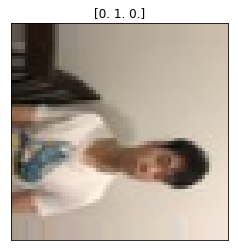

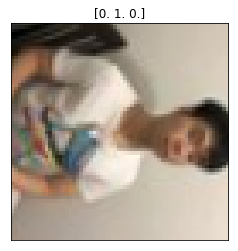

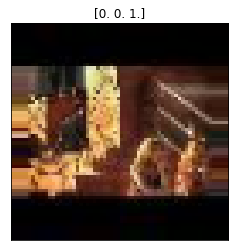

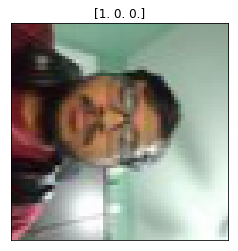

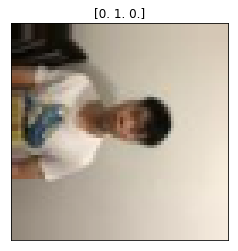

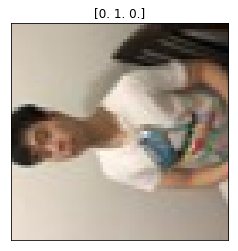

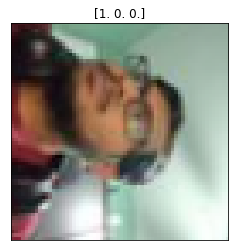

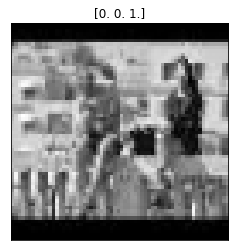

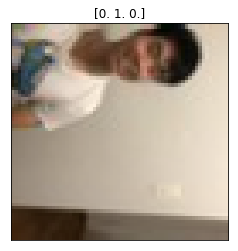

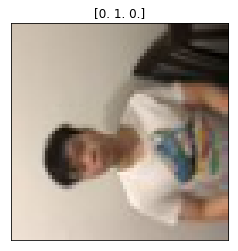

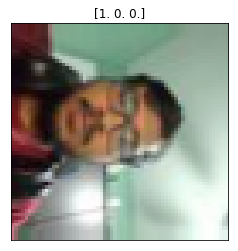

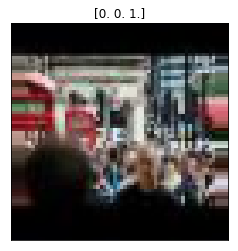

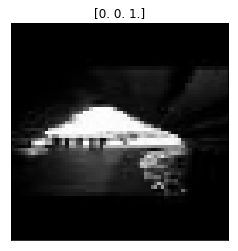

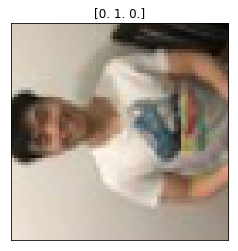

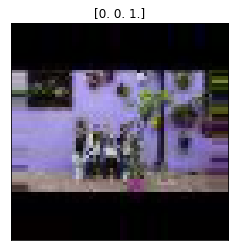

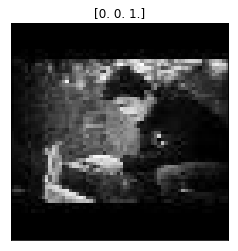

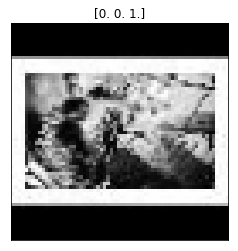

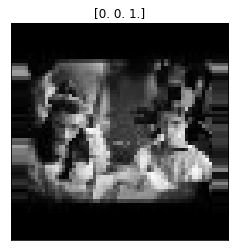

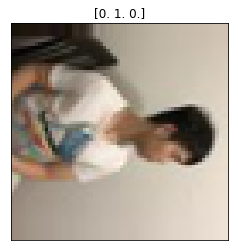

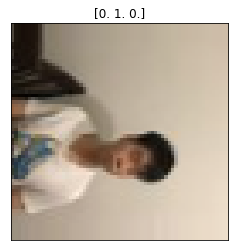

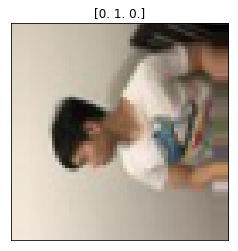

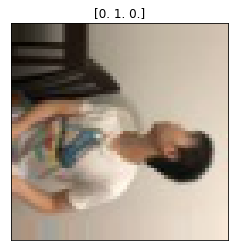

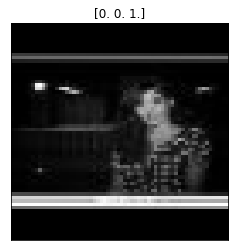

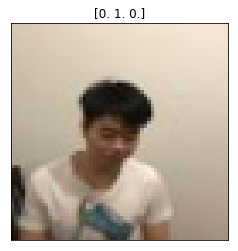

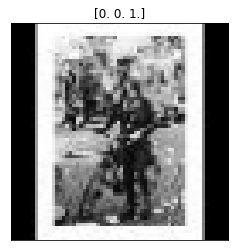

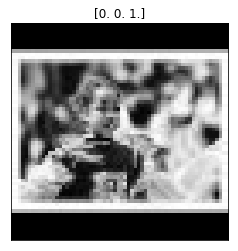

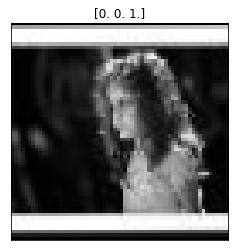

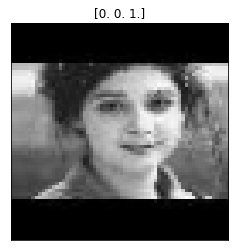

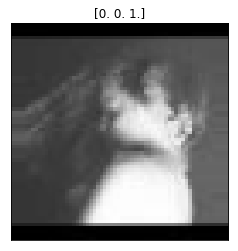

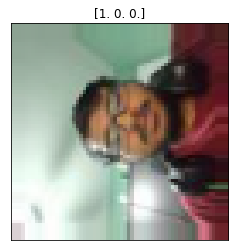

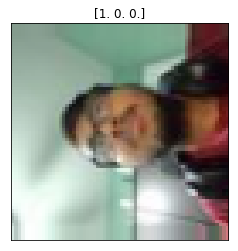

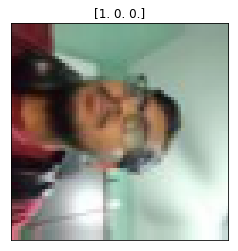

In [16]:
X,y = train_generator.next()
for i in range (len(X)):
    disp_image(X[i])
    plt.title(y[i])
    plt.show()

Training the model

In [17]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#categorical_crossentropy
steps_per_epoch =  train_generator.n // batch_size
validation_steps =  test_generator.n // batch_size

nepochs = 10

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

Epoch 1/10
13/13 [==============================] - 12s 896ms/step - loss: 1.0889 - acc: 0.3950 - val_loss: 1.0798 - val_acc: 0.3937
Epoch 2/10
13/13 [==============================] - 11s 877ms/step - loss: 1.0648 - acc: 0.5264 - val_loss: 1.0616 - val_acc: 0.4250
Epoch 3/10
13/13 [==============================] - 11s 880ms/step - loss: 1.0479 - acc: 0.4926 - val_loss: 1.0453 - val_acc: 0.4625
Epoch 4/10
13/13 [==============================] - 11s 861ms/step - loss: 1.0338 - acc: 0.5759 - val_loss: 1.0276 - val_acc: 0.6062
Epoch 5/10
13/13 [==============================] - 11s 879ms/step - loss: 1.0060 - acc: 0.6743 - val_loss: 1.0072 - val_acc: 0.6875
Epoch 6/10
13/13 [==============================] - 11s 881ms/step - loss: 0.9832 - acc: 0.7274 - val_loss: 0.9862 - val_acc: 0.7438
Epoch 7/10
13/13 [==============================] - 11s 863ms/step - loss: 0.9582 - acc: 0.8170 - val_loss: 0.9629 - val_acc: 0.8187
Epoch 8/10
13/13 [==============================] - 11s 866ms/step - 

Training Accuracy vs. Valication Accuracy per Epoch

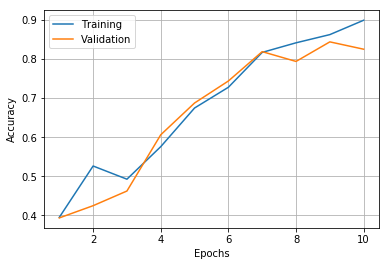

In [18]:
x = np.arange(1,nepochs+1)
plt.plot(x,hist.history['acc'],'-')
plt.plot(x,hist.history['val_acc'],'-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.grid()

Testing the Model testing set

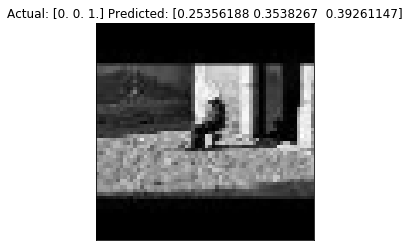

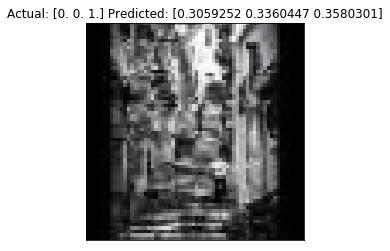

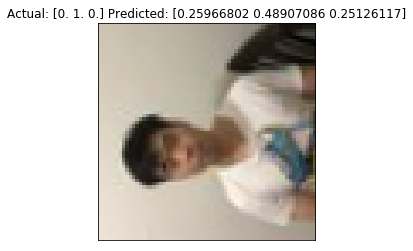

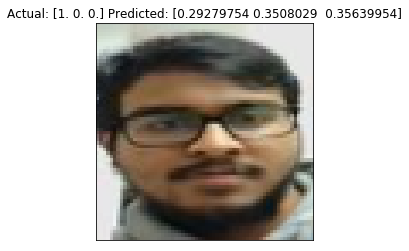

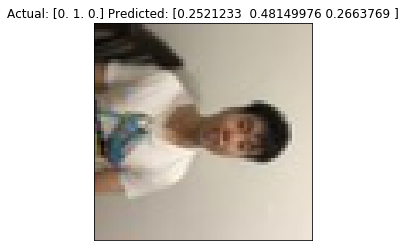

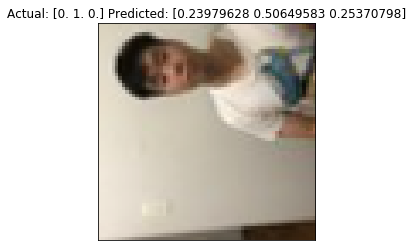

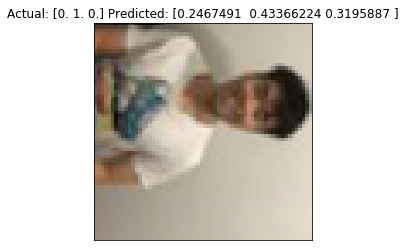

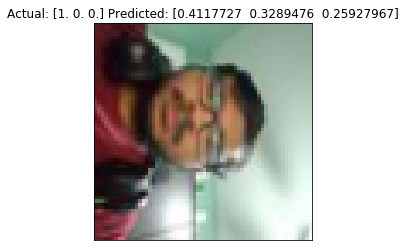

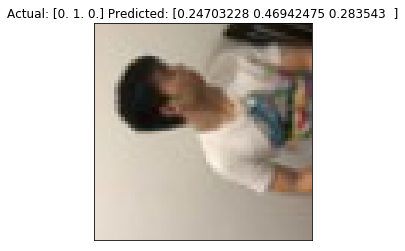

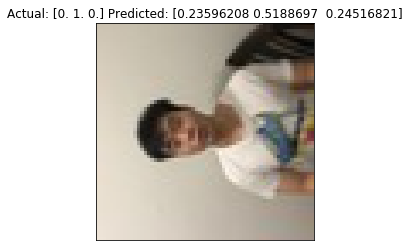

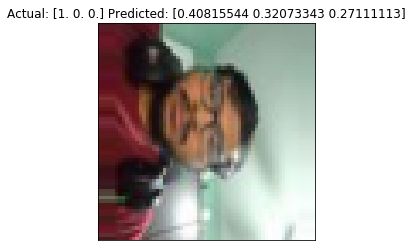

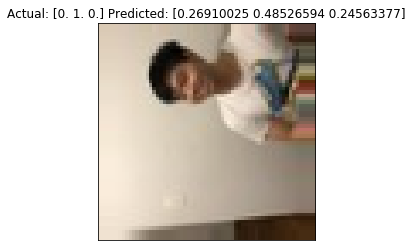

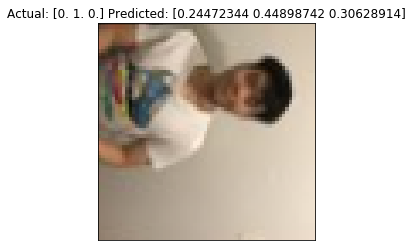

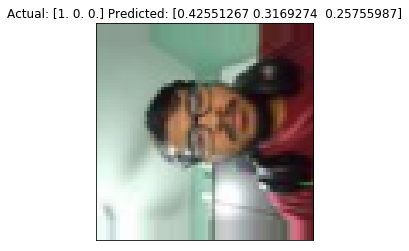

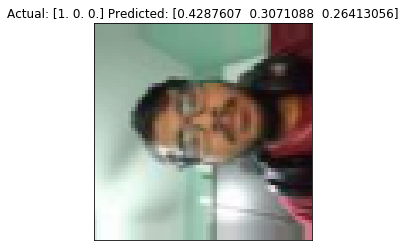

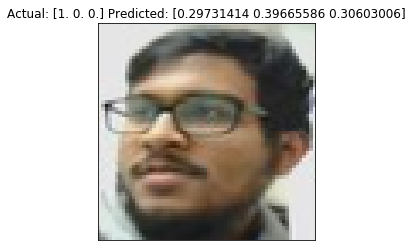

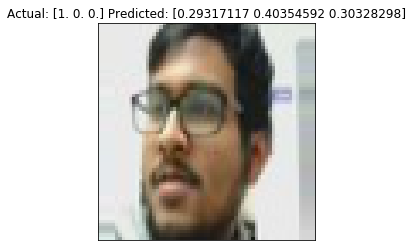

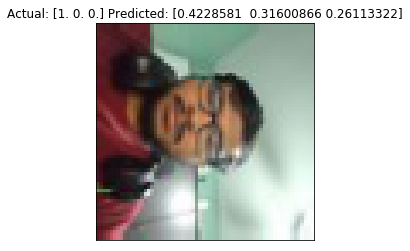

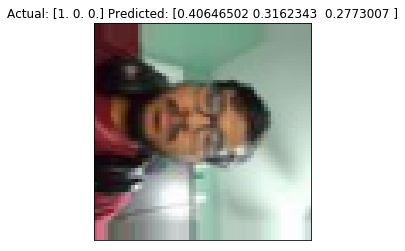

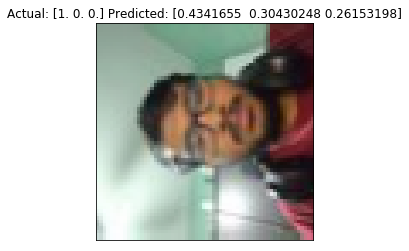

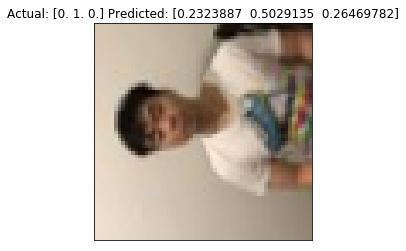

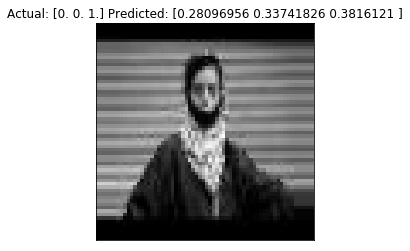

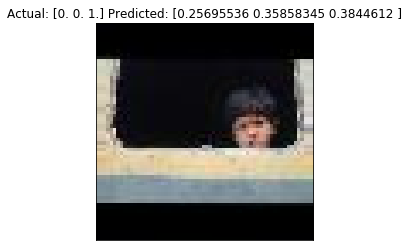

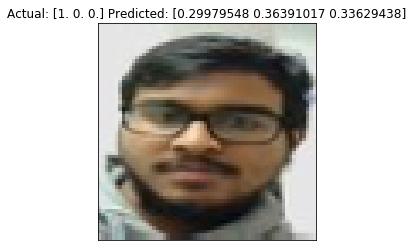

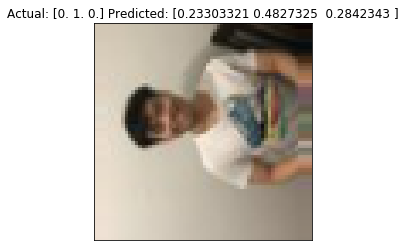

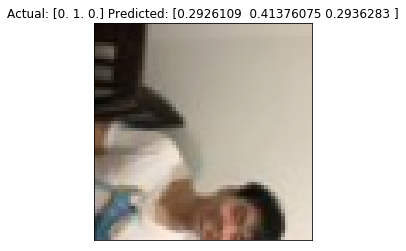

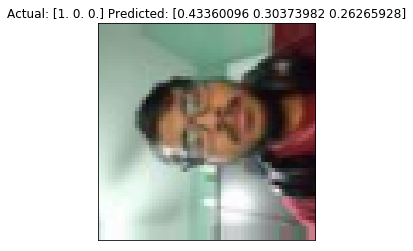

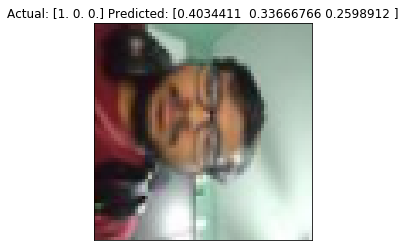

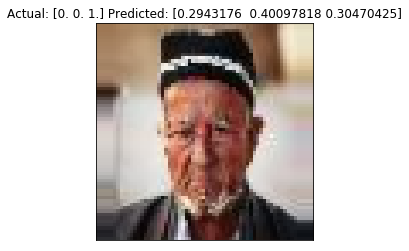

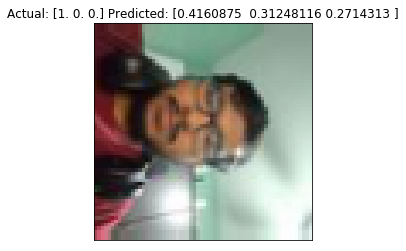

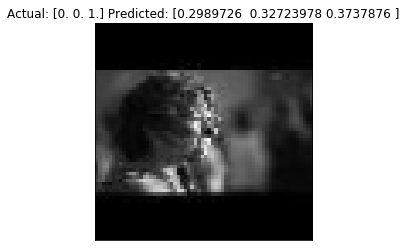

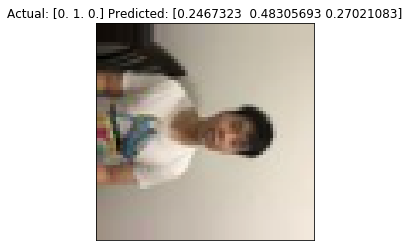

In [19]:
Xtest,ytest = test_generator.next()
yhat = model.predict(Xtest)
l = len(Xtest)
for i in range (l):
    disp_image(Xtest[i])
    plt.title("Actual: "+str(ytest[i])+" Predicted: " + str(yhat[i]))
    plt.show()


Saving the model to a H5 file to Project folder

In [20]:
#Model to JSON
model_json = model.to_json()
with open("model.json", "w") as f:
    f.write(model_json)
#Weights to HDF5
model.save_weights("weights.h5")
print("Saved model to disk")

Saved model to disk


Loading and testing model

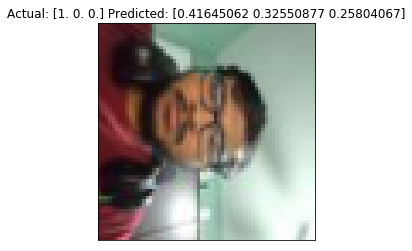

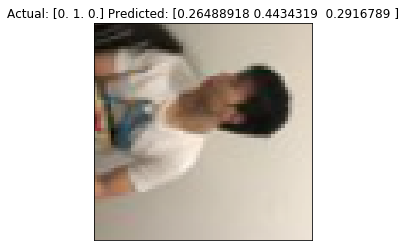

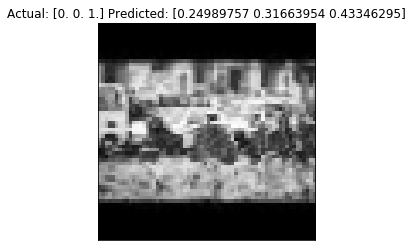

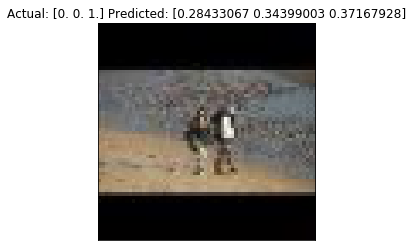

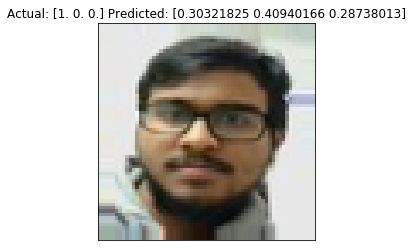

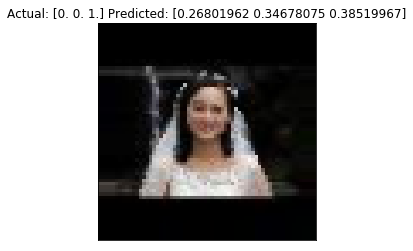

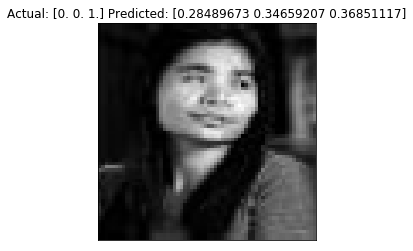

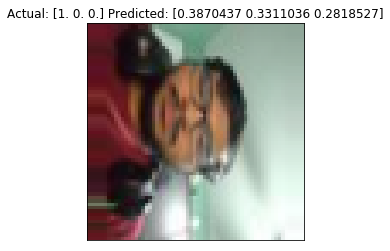

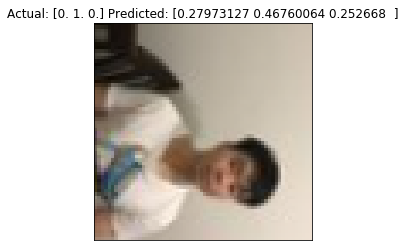

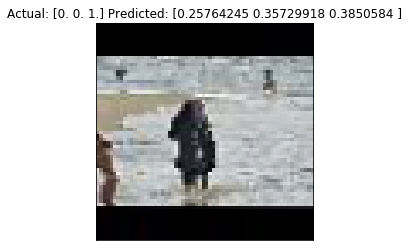

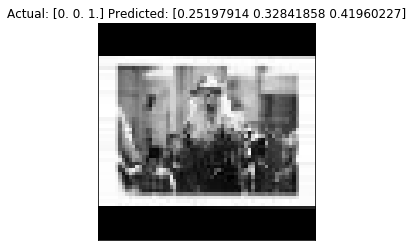

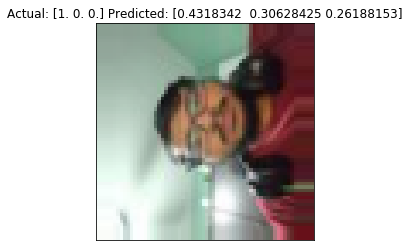

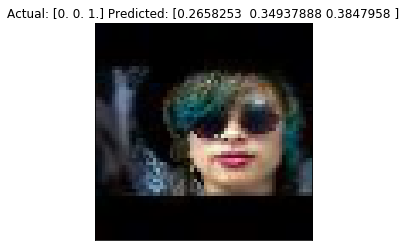

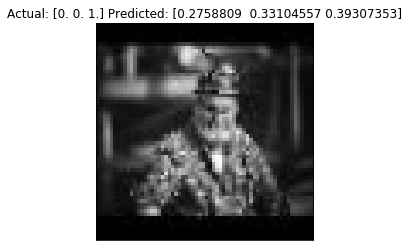

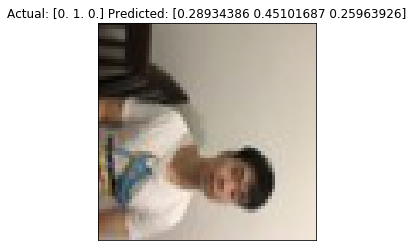

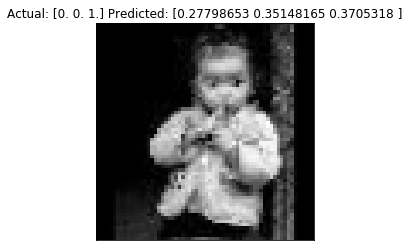

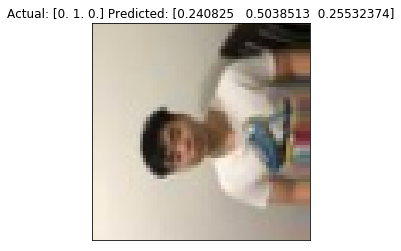

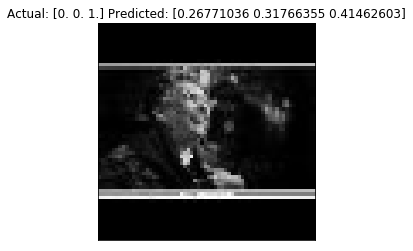

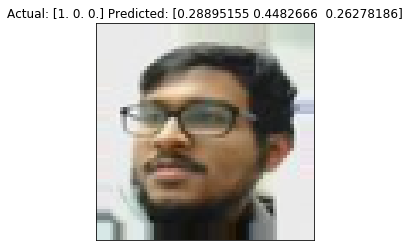

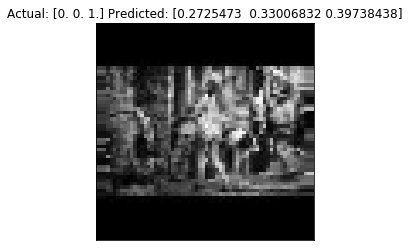

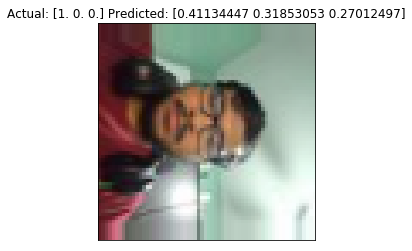

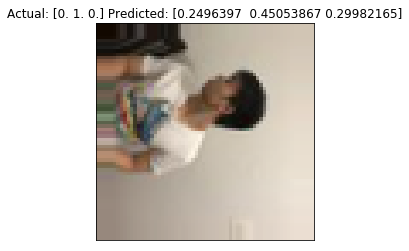

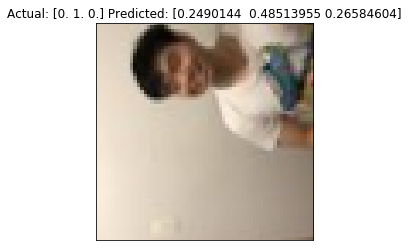

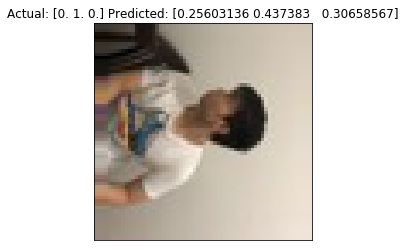

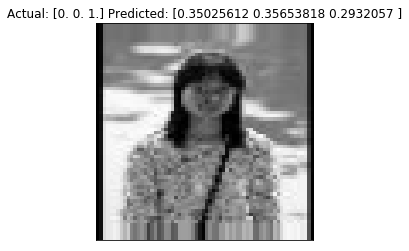

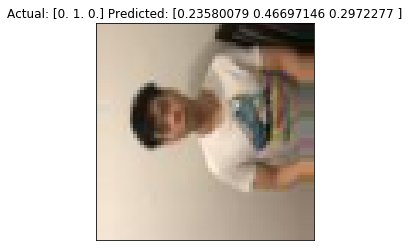

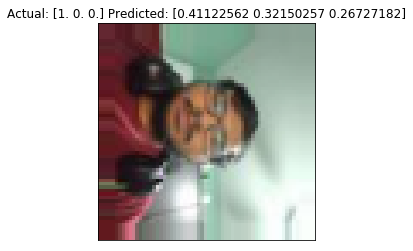

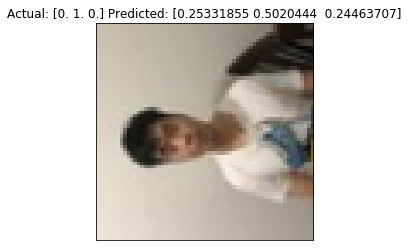

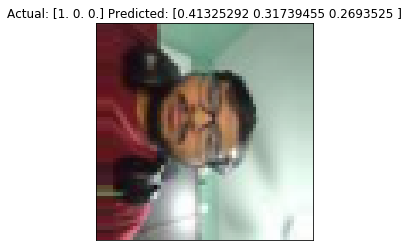

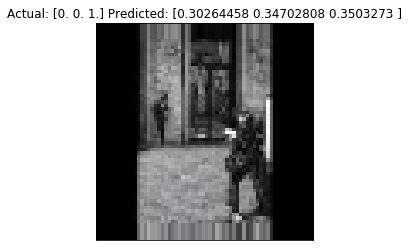

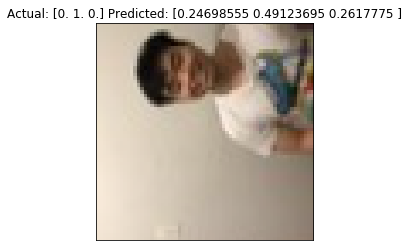

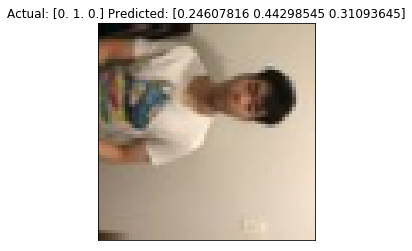

In [21]:
with open('model.json','r') as f:
    json = f.read()
loaded_model = model_from_json(json)
loaded_model.load_weights("weights.h5", by_name=True)

 
# evaluate loaded model on test data
loaded_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Xtest,ytest = test_generator.next()
yhat = loaded_model.predict(Xtest)
l = len(Xtest)
for i in range (l):
    disp_image(Xtest[i])
    plt.title("Actual: "+str(ytest[i])+" Predicted: " + str(yhat[i]))
    plt.show()